# Importing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
header = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
       'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
test_df = pd.read_csv(r'C:\Users\chris\OneDrive - McGill University\Desktop\McGill\u3\comp551\mini-project_1/adult.test',header=None,na_values = ' ?',names = header)
data_df = pd.read_csv(r'C:\Users\chris\OneDrive - McGill University\Desktop\McGill\u3\comp551\mini-project_1/adult.data',header=None,na_values = ' ?',names = header)

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#number of rows x number of columns
print(data_df.shape)
data_df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Cleaning

In [5]:
# Create a copy of the dataframe
df = data_df.copy(deep = True)

# convert "?" values to Na for further processing
for col in data_df.columns:
  df[[col]] = data_df[[col]].replace('?',np.NaN)

In [6]:
#select feature column from dataset
null_data = df.iloc[:,:-1]

#count null value for all attributes
null_data.isnull().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64

In [7]:
# drop invalid data rows
df = df.dropna()
print(df.shape)

(30162, 15)


In [8]:
#count again for null value after dropna()
null_data = df.iloc[:,:-1]
null_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [9]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# One-hot Encoding

In [10]:
# Converting 'sex' and 'salary' to numerical

# Male = 1, Female = 0
df["sex"] = np.where(df.sex == ' Male', 1, 0)
# Salary > 50K = 1, < 50K = 0
df["salary"] = np.where(df.salary == ' >50K', 1 , 0)


In [11]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


# 

In [12]:
# Create a dataframe with object data type
obj_col= []
for col in df.columns:
    if df[col].dtype == "object":
        obj_col.append(col)
print(obj_col)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']


In [13]:
# Create a dataframe with object data type
int_col= []
for col in df.columns:
    if df[col].dtype == "int64":
        int_col.append(col)
print(int_col)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [14]:
# Create copies of dataset for data preparation purposes
df_copy = df.copy(deep = True)

In [15]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler

# Normalize numeric attributes and assign it into a new dataframe
df_int = pd.DataFrame(std_scaler.fit_transform(df_copy[int_col]), columns=int_col)

In [16]:
df_int.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.042796,-1.062722,1.128918,0.146092,-0.218586,-0.077734
1,0.880288,-1.007871,1.128918,-0.147445,-0.218586,-2.331531
2,-0.033340,0.244693,-0.439738,-0.147445,-0.218586,-0.077734
3,1.108695,0.425240,-1.224066,-0.147445,-0.218586,-0.077734
4,-0.794697,1.406658,1.128918,-0.147445,-0.218586,-0.077734


In [17]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

# enconde categorical features into numerical features
df_obj = df.copy()
df_obj.drop(int_col,axis='columns', inplace=True)

#print(df_obj)

for col in df_obj.columns[:]:
  if df_obj[col].dtype == "object":
    df_obj[col] = ord_enc.fit_transform(df_obj[[col]])
    
print(df_obj)

       workclass  education  marital-status  occupation  relationship  race  \
0            5.0        9.0             4.0         0.0           1.0   4.0   
1            4.0        9.0             2.0         3.0           0.0   4.0   
2            2.0       11.0             0.0         5.0           1.0   4.0   
3            2.0        1.0             2.0         5.0           0.0   2.0   
4            2.0        9.0             2.0         9.0           5.0   2.0   
...          ...        ...             ...         ...           ...   ...   
32556        2.0        7.0             2.0        12.0           5.0   4.0   
32557        2.0       11.0             2.0         6.0           0.0   4.0   
32558        2.0       11.0             6.0         0.0           4.0   4.0   
32559        2.0       11.0             4.0         0.0           3.0   4.0   
32560        3.0       11.0             2.0         3.0           5.0   4.0   

       sex  native-country  salary  
0        1    

In [18]:
# Insert id column to different datasets
df_int.insert(0, 'id', range(0, 0 + len(df_int)))
df_obj.insert(0, 'id', range(0, 0 + len(df_obj)))

# Show shapes for datasets
#print(df_int.shape)
print("-----------------df_int------------------")
print(df_int)
#print(df_obj.shape)
print("-----------------df_obj------------------")
print(df_obj)

-----------------df_int------------------
          id       age    fnlwgt  education-num  capital-gain  capital-loss  \
0          0  0.042796 -1.062722       1.128918      0.146092     -0.218586   
1          1  0.880288 -1.007871       1.128918     -0.147445     -0.218586   
2          2 -0.033340  0.244693      -0.439738     -0.147445     -0.218586   
3          3  1.108695  0.425240      -1.224066     -0.147445     -0.218586   
4          4 -0.794697  1.406658       1.128918     -0.147445     -0.218586   
...      ...       ...       ...            ...           ...           ...   
30157  30157 -0.870832  0.638972       0.736754     -0.147445     -0.218586   
30158  30158  0.118931 -0.335252      -0.439738     -0.147445     -0.218586   
30159  30159  1.489374 -0.358575      -0.439738     -0.147445     -0.218586   
30160  30160 -1.251511  0.110705      -0.439738     -0.147445     -0.218586   
30161  30161  1.032559  0.928841      -0.439738      1.881120     -0.218586   

       ho

In [19]:
# Merge all datasets
df_feature = pd.merge(df_int,df_obj, on=["id"])

# Show the the tope 5 obersrvation of the dataset
df_feature.head(5)

,id,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,0,0.042796,-1.062722,1.128918,0.146092,-0.218586,-0.077734,5.0,9.0,4.0,0.0,1.0,4.0,1,38.0,0
1,1,0.880288,-1.007871,1.128918,-0.147445,-0.218586,-2.331531,4.0,9.0,2.0,3.0,0.0,4.0,1,38.0,0
2,2,-0.033340,0.244693,-0.439738,-0.147445,-0.218586,-0.077734,2.0,11.0,0.0,5.0,1.0,4.0,1,38.0,0
3,3,1.108695,0.425240,-1.224066,-0.147445,-0.218586,-0.077734,2.0,1.0,2.0,5.0,0.0,2.0,1,38.0,0
4,4,-0.794697,1.406658,1.128918,-0.147445,-0.218586,-0.077734,2.0,9.0,2.0,9.0,5.0,2.0,0,4.0,0


In [20]:
#drop id column
df_feature.drop('id',axis='columns', inplace=True)

In [21]:
df_feature.head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,0.042796,-1.062722,1.128918,0.146092,-0.218586,-0.077734,5.0,9.0,4.0,0.0,1.0,4.0,1,38.0,0
1,0.880288,-1.007871,1.128918,-0.147445,-0.218586,-2.331531,4.0,9.0,2.0,3.0,0.0,4.0,1,38.0,0
2,-0.033340,0.244693,-0.439738,-0.147445,-0.218586,-0.077734,2.0,11.0,0.0,5.0,1.0,4.0,1,38.0,0
3,1.108695,0.425240,-1.224066,-0.147445,-0.218586,-0.077734,2.0,1.0,2.0,5.0,0.0,2.0,1,38.0,0
4,-0.794697,1.406658,1.128918,-0.147445,-0.218586,-0.077734,2.0,9.0,2.0,9.0,5.0,2.0,0,4.0,0


# Visualization

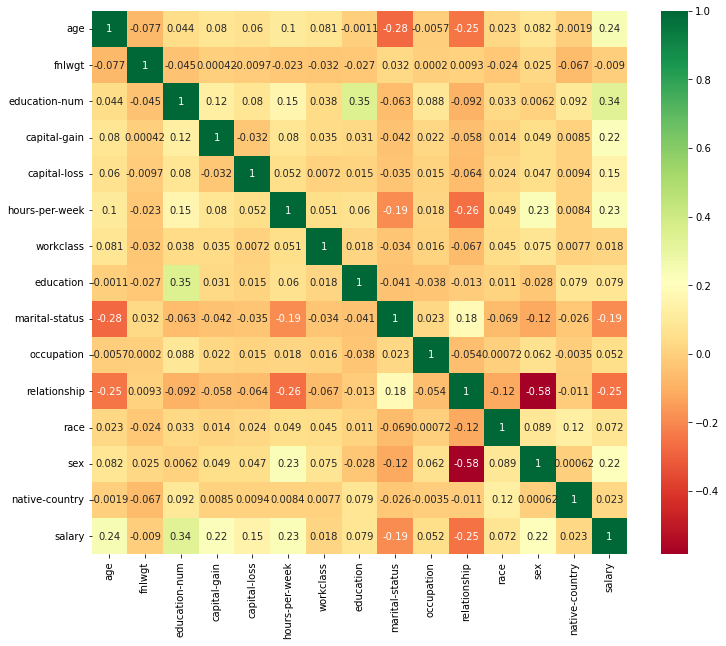

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# on this line I just set the size of figure to 12 by 10.
plt.figure(figsize=(12,10))
# seaborn has very simple solution
p=sns.heatmap(df_feature.corr(), annot=True,cmap ='RdYlGn')  

# KNN 5-fold Cross Validation